In [92]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
regressor=LinearRegression()

In [93]:
df=pd.read_csv('California_housing.csv')
df['median_house_value'] = np.log1p(df['median_house_value'])


In [94]:
df_copy=df

In [95]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [96]:
df_copy.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [97]:
df_copy.drop(['ocean_proximity','longitude','latitude'],axis=1,inplace=True)

In [98]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  float64
 1   total_rooms         20640 non-null  float64
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  float64
 4   households          20640 non-null  float64
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  float64
dtypes: float64(7)
memory usage: 1.1 MB


In [99]:
df.isna().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [100]:
df['total_bedrooms'].fillna(value=np.mean(df['total_bedrooms']),inplace=True)

C:\Users\saiva\AppData\Local\Temp\ipykernel_13344\1993597422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(value=np.mean(df['total_bedrooms']),inplace=True)


In [101]:
df.isna().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [102]:
df_copy

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687
2,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673
3,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520
4,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154
...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,11.265758
20636,18.0,697.0,150.0,356.0,114.0,2.5568,11.252872
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,11.432810
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,11.346883


In [103]:
df_copy.columns

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income', 'median_house_value'],
      dtype='object')

In [104]:
X=df_copy[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y=df_copy['median_house_value']

In [105]:
X

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,41.0,880.0,129.0,322.0,126.0,8.3252
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,52.0,1467.0,190.0,496.0,177.0,7.2574
3,52.0,1274.0,235.0,558.0,219.0,5.6431
4,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,18.0,697.0,150.0,356.0,114.0,2.5568
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,18.0,1860.0,409.0,741.0,349.0,1.8672


In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
y_test

20046    10.772708
3024     10.732061
15663    13.122367
20484    12.295003
9814     12.535380
           ...    
15362    12.481053
16623    12.494258
18086    13.122367
2144     11.188593
3665     11.928348
Name: median_house_value, Length: 4128, dtype: float64

In [108]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [109]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [110]:
X_train

array([[ 0.34849025,  0.22256942,  0.21122752,  0.76827628,  0.32290591,
        -0.326196  ],
       [ 1.61811813,  0.34029326,  0.59309419, -0.09890135,  0.6720272 ,
        -0.03584338],
       [-1.95271028, -0.34259695, -0.49522582, -0.44981806, -0.43046109,
         0.14470145],
       ...,
       [ 0.58654547, -0.24878577,  0.07280085,  0.28983345,  0.07090859,
        -0.49697313],
       [-1.07984112,  0.42904599,  0.13962752,  0.30830275,  0.15490769,
         0.96545045],
       [ 1.85617335,  0.72841402,  1.85325421,  1.04883375,  1.94776365,
        -0.68544764]])

In [111]:
regressor

LinearRegression()

In [112]:
regressor.fit(X_train,y_train)

LinearRegression()

In [113]:
y_pred=regressor.predict(X_test)

In [114]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [115]:
mse=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
rmse=mean_squared_error(y_test,y_pred,squared=False)

c:\Users\saiva\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [120]:
Rmse=np.sqrt(mse)
Rmse

0.4038148001541698

In [116]:
mse

0.16306639282355212

In [117]:
rmse

0.4038148001541698

In [118]:
score

0.49757913186315683

In [121]:
df_copy.corr()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.076007
total_rooms,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.154154
total_bedrooms,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.078286
population,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,0.014745
households,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.098728
median_income,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.658431
median_house_value,0.076007,0.154154,0.078286,0.014745,0.098728,0.658431,1.000000


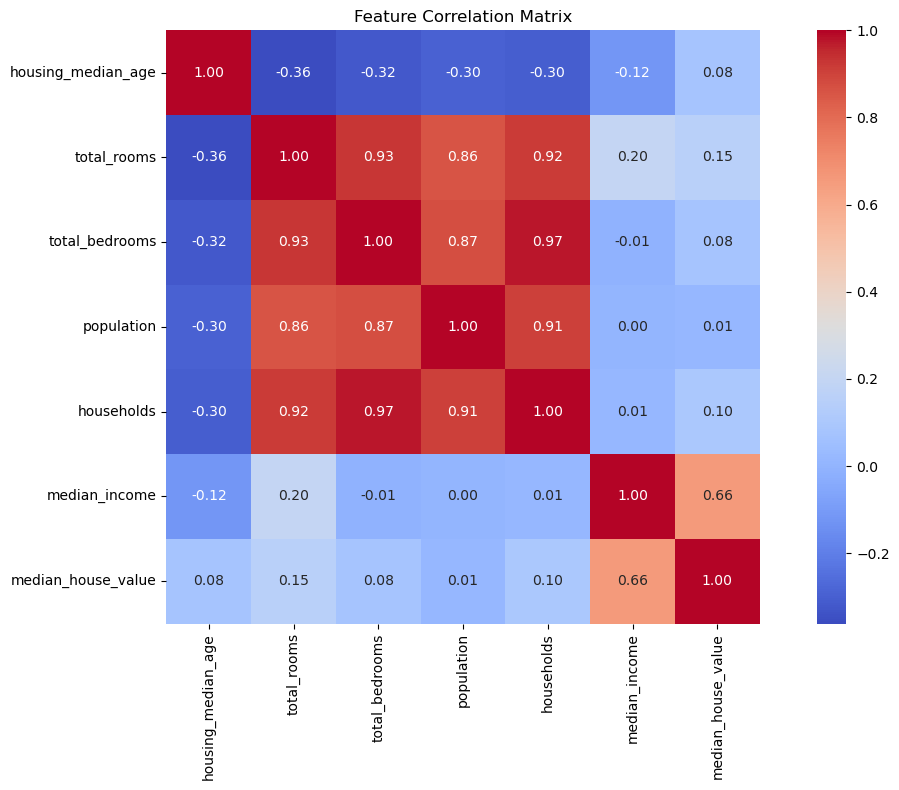

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

### Dimensionality reduction using correlation b/w features

In [153]:

# 1. Calculate absolute correlation matrix
cor_matrix = df.corr().abs()

# 2. Select upper triangle of correlation matrix (to avoid duplicate pairs)
upper = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))

# 3. Find features with correlation greater than 0.85
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print("Columns to drop due to high correlation:", to_drop)

# 4. Drop these columns from the original DataFrame
df_reduced = df.drop(columns=to_drop)


Columns to drop due to high correlation: ['total_bedrooms', 'population', 'households']


In [154]:
df_reduced.to_csv('Reduced_features in MLR.csv')